# ENEM Data Analysis

ENEM stands for "Exame Nacional do Ensino Médio," which translates to the National High School Exam in English. It is an annual standardized test administered in Brazil. The exam is conducted by the Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), which is the Brazilian Ministry of Education's assessment agency.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
enem_df = pd.read_csv('enem-2022/DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1', decimal=',')
enem_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [3]:
enem_df['NU_NOTA_CN'] = enem_df['NU_NOTA_CH'].astype('float64')
enem_df['NU_NOTA_CH'] = enem_df['NU_NOTA_CN'].astype('float64')
enem_df['NU_NOTA_LC'] = enem_df['NU_NOTA_LC'].astype('float64')
enem_df['NU_NOTA_MT'] = enem_df['NU_NOTA_MT'].astype('float64')
enem_df['NU_NOTA_REDACAO'] = enem_df['NU_NOTA_REDACAO'].astype('float64')

enem_df['MEAN_SCORE'] = enem_df[\
    ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]\
    .mean(axis=1)
enem_df_copy = enem_df.copy()

## School Type
* 1 - Did not inform
* 2 - Public
* 3 - Private

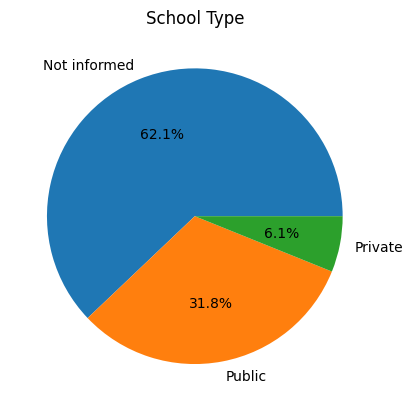

In [4]:
school_type = enem_df['TP_ESCOLA'].value_counts()
school_type_labels = ['Not informed', 'Public', 'Private']
plt.pie(school_type, labels=school_type_labels, autopct='%1.1f%%')
plt.title('School Type')
plt.show()

Ignore the "Did not inform" category.

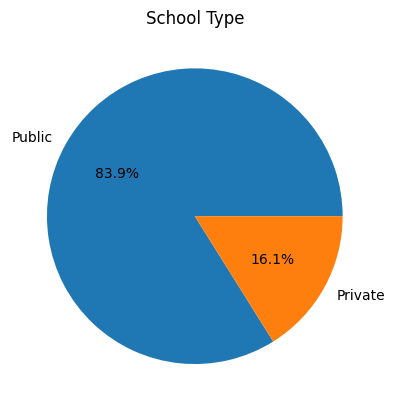

In [5]:
school_type = enem_df['TP_ESCOLA'].value_counts()
school_type_labels = ['Public', 'Private']
plt.pie(school_type[1:], labels=school_type_labels, autopct='%1.1f%%')
plt.title('School Type')
plt.show()

### Practice Participants

In [6]:
enem_df['IN_TREINEIRO'].value_counts(normalize=True)\
    .mul(100).round(1).astype(str) + '%'

IN_TREINEIRO
0    85.2%
1    14.8%
Name: proportion, dtype: object

In [7]:
school_type

TP_ESCOLA
1    2158545
2    1105355
3     212205
Name: count, dtype: int64

In [8]:
enem_df.loc[enem_df['IN_TREINEIRO'] == 0]['TP_ESCOLA'].value_counts()

TP_ESCOLA
1    1645813
2    1105355
3     212205
Name: count, dtype: int64

All practice participants did not inform their school type.

## School Administration

In [9]:
school_administration_types = {
    1: "Federal",
    2: "State",
    3: "Municipal",
    4: "Private"
}

enem_df['TP_DEPENDENCIA_ADM_ESC'] = enem_df['TP_DEPENDENCIA_ADM_ESC']\
    .map(school_administration_types)

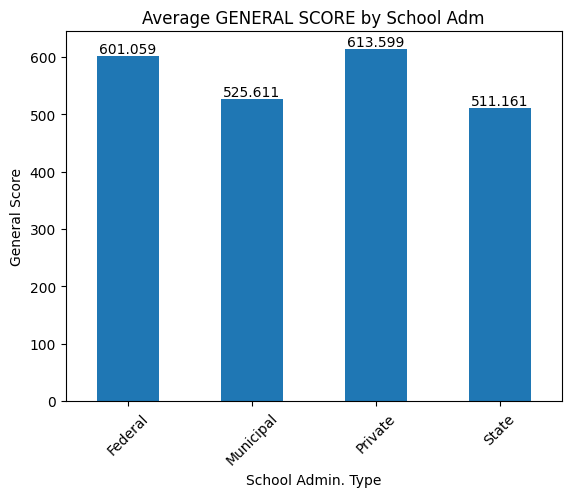

In [10]:
ax = enem_df.groupby('TP_DEPENDENCIA_ADM_ESC')['MEAN_SCORE'].mean()\
    .plot(kind='bar', title='Average GENERAL SCORE by School Adm',\
           xlabel='School Admin. Type', ylabel='General Score')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## Age Group

In [11]:
age_ranges = {
    1: "a: < 17",
    2: "b: 17",
    3: "c: 18",
    4: "d: 19",
    5: "e: 20",
    6: "f: 21",
    7: "g: 22",
    8: "h: 23",
    9: "i: 24",
    10: "j: 25",
    11: "k: (26 - 30)",
    12: "l: (31 - 35)",
    13: "m: (36 - 40)",
    14: "n: (41 - 45)",
    15: "o: (46 - 50)",
    16: "p: (51 - 55)",
    17: "q: (56 - 60)",
    18: "r: (61 - 65)",
    19: "s: (66 - 70)",
    20: "t: > 70"
}

enem_df['TP_FAIXA_ETARIA'] = [age_ranges[age] for age in enem_df['TP_FAIXA_ETARIA']]

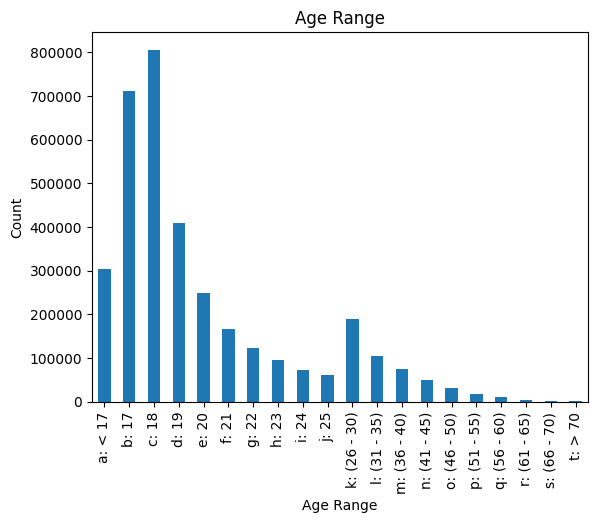

In [12]:
enem_df['TP_FAIXA_ETARIA'].value_counts().sort_index()\
    .plot(kind='bar', title='Age Range', xlabel='Age Range', ylabel='Count')
plt.show()

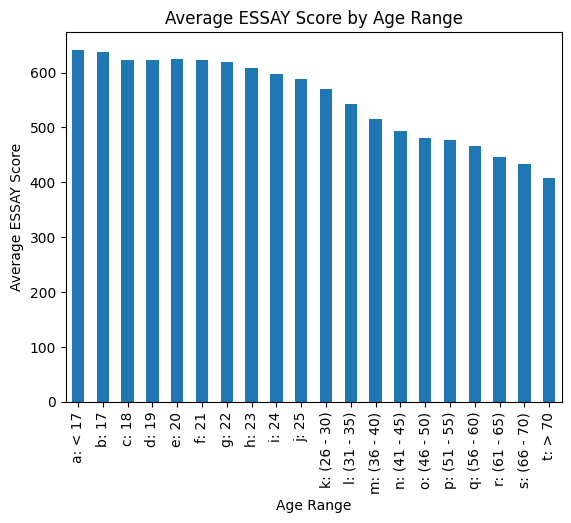

In [13]:
enem_df.groupby('TP_FAIXA_ETARIA')['NU_NOTA_REDACAO'].mean()\
    .plot(kind='bar', title='Average ESSAY Score by Age Range',\
           xlabel='Age Range', ylabel='Average ESSAY Score')
plt.show()

## States

Text(0, 0.5, 'Count')

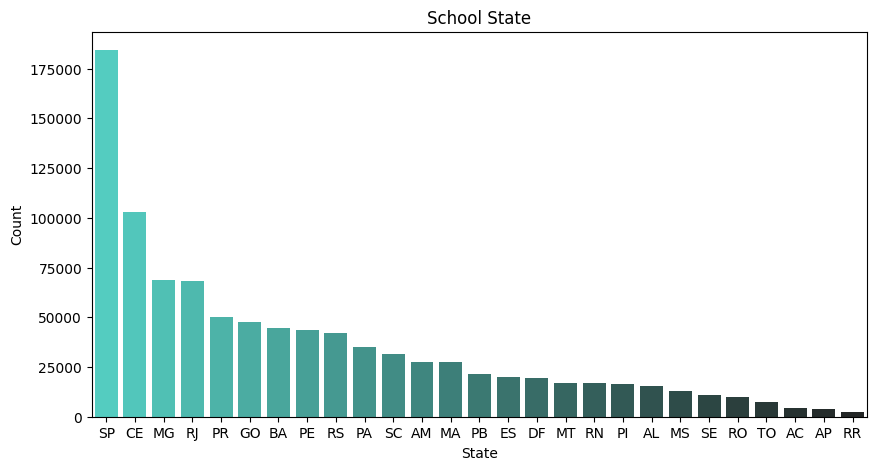

In [14]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=enem_df, x='SG_UF_ESC', \
        order=enem_df['SG_UF_ESC'].value_counts().index, \
        palette='dark:turquoise_r')
plt.title('School State')
plt.xlabel('State')
plt.ylabel('Count')

## Marital Status

In [15]:
enem_df['TP_ESTADO_CIVIL'].value_counts()

TP_ESTADO_CIVIL
1    3127949
2     165719
0     128493
3      50380
4       3564
Name: count, dtype: int64

### Marital Status for < 18

In [16]:
marital_status = {
    0: "Not informed",
    1: "Single",
    2: "Married/Living with partner",
    3: "Divorced/Separated",
    4: "Widowed"
}

enem_df['TP_ESTADO_CIVIL'] = enem_df['TP_ESTADO_CIVIL']\
    .map(marital_status)

In [17]:
selected_age = ['a: < 17', 'b: 17', 'c: 18']

enem_df[enem_df['TP_FAIXA_ETARIA'].isin(selected_age)]\
    .groupby('TP_FAIXA_ETARIA')['TP_ESTADO_CIVIL']\
    .value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

TP_FAIXA_ETARIA  TP_ESTADO_CIVIL            
a: < 17          Single                         95.8%
                 Not informed                    3.3%
                 Divorced/Separated              0.6%
                 Married/Living with partner     0.2%
                 Widowed                         0.0%
b: 17            Single                         95.9%
                 Not informed                    3.2%
                 Divorced/Separated              0.6%
                 Married/Living with partner     0.3%
                 Widowed                         0.0%
c: 18            Single                         96.2%
                 Not informed                    2.7%
                 Divorced/Separated              0.6%
                 Married/Living with partner     0.4%
                 Widowed                         0.0%
Name: proportion, dtype: object

In [18]:
selected_age = [
"m: (36 - 40)",
"n: (41 - 45)",
"o: (46 - 50)",
"p: (51 - 55)",
"q: (56 - 60)",
]

enem_df[enem_df['TP_FAIXA_ETARIA'].isin(selected_age)]\
    .groupby('TP_FAIXA_ETARIA')['TP_ESTADO_CIVIL']\
    .value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

TP_FAIXA_ETARIA  TP_ESTADO_CIVIL            
m: (36 - 40)     Single                         45.2%
                 Married/Living with partner    35.9%
                 Not informed                   10.2%
                 Divorced/Separated              8.2%
                 Widowed                         0.5%
n: (41 - 45)     Married/Living with partner    41.3%
                 Single                         37.4%
                 Divorced/Separated             10.8%
                 Not informed                    9.7%
                 Widowed                         0.9%
o: (46 - 50)     Married/Living with partner    43.7%
                 Single                         32.8%
                 Divorced/Separated             13.1%
                 Not informed                    8.9%
                 Widowed                         1.5%
p: (51 - 55)     Married/Living with partner    43.9%
                 Single                         29.8%
                 Divorced/Separated  